<h1>Capstone Project To Predicting Churning Customers Inside 21st Century</h1>
<h3>Autor: Henrique Martins Prado</h3>

<ul>
    <li><h4>Objective: The development of this project aimed to identify the churn generation of customers.</h4>
    <li><h4>Motivation: The project's motivation was to analyze patterns, trends and predictions extracted from the data using machine learning models capable of identifying the significant decrease in the use of services and products by customers.</h4>
    <li><h4>Importance: The importance of development is precisely to provide companies with the possibility to identify the decrease in consumption of their businesses and to act in order to identify the problems that caused this decrease, as well as to explore new possibilities to retain and attract new customers with differentiated services and new products.</h4>  
    <li><h4>Approach: In the development of the project, the 6 stages of the CRISP-DM methodology were used, precisely because it is a very consolidated methodology in the area of data mining and with a completeness of topics to be developed and explored that allows to create data solutions.</h4>
</ul>

<h4>Import Libraries</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.inspection import permutation_importance 
from matplotlib import pyplot

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

C:\Users\hik_m\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
!python --version

Python 3.8.5


<h4>Jupyer Notebook Configuration</h4>

In [3]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container {width:90% !important;}</style>"))

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 2000)

<h4>Phases of CRISP-DM are going to use as reference to develop this project</h4>

<h4><h4><font color='blue'>================== Phase 1: Understanding the Business ===================</font></h4>
<h5>What problem I would like to solve?</h5>
    <font color = "green">Predict Churning customers</font>

<h5><br>Questions to guide the business:</h5>
<ul>
<li><h5>Background: In which situation the company is and how the project is going to be conducted to solve the problem?</h5>
<li><h5>Goal: What is the major goal of this project?</h5>
<li><h5>Sucess Criteria: What metric will be use that will inform your project got the sucess?</h5>
</ul>



<h5><br>Main questions that I need to answer:</h5>
<ul>    
    <li><font color='green'><h5>Is it possible to achieve a hit rate above 80% in the customer's churn forecast?</h5>
    <li><font color='green'><h5>What is the level of correlation between the variables age, year and total_pucharse?</h5>
    <li><font color='green'><h5>Is the solution developed passive to be applied in a way that the business identified benefits?</h5>
</ul>

<h4><h4><font color='blue'>==================== Phase 2: Understanding the Data ===================</font></h4>
<h5>This part is responsible for collect and treat the data. Normally, this part is responsilble for 70% of the time that you will spend in a project.</h5>

<ul>
    <li>In this part I'll collect, describe, explore and check the quality of the data.</li>
</ul>

In [4]:
df = pd.read_csv(r'C:\Users\hik_m\Documents\Jornada do Conhecimento\Projetos\Capstone Projetct Churning Customers\Datasets\Customer_Churn.csv')
# Shows the type of the object
type(df)

pandas.core.frame.DataFrame

In [5]:
# Show the top 5 rows
df.head()

Names   Age  Total_Purchase  Account_Manager  Years  Num_Sites  \
0  Cameron Williams  42.0        11066.80                0   7.22        8.0   
1     Kevin Mueller  41.0        11916.22                0   6.50       11.0   
2       Eric Lozano  38.0        12884.75                0   6.67       12.0   
3     Phillip White  42.0         8010.76                0   6.71       10.0   
4    Cynthia Norton  37.0         9191.58                0   5.56        9.0   

          Onboard_date                                           Location  \
0  2013-08-30 07:00:40      10265 Elizabeth Mission Barkerburgh, AK 89518   
1  2013-08-13 00:38:46  6157 Frank Gardens Suite 019 Carloshaven, RI 1...   
2  2016-06-29 06:20:07             1331 Keith Court Alyssahaven, DE 90114   
3  2014-04-22 12:43:12       13120 Daniel Mount Angelabury, WY 30645-4695   
4  2016-01-19 15:31:15                765 Tricia Row Karenshire, MH 71730   

                       Company  Churn  
0                   Harvey LLC      1  
1                   Wilson PLC      1  
2  Miller, Johnson and Wallace      1  
3                    Smith Inc      1  
4                   Love-Jones      1

In [6]:
# Show the last 5 rows 
df.tail()

Names   Age  Total_Purchase  Account_Manager  Years  Num_Sites  \
895      Paul Miller  42.0        12800.82                1   3.62        8.0   
896   Natalie Hodges  52.0         9893.92                0   6.91        7.0   
897        Ana Smith  45.0        12056.18                0   5.46        4.0   
898   Justin Leonard  51.0         6517.93                1   5.47       10.0   
899  Joseph Williams  39.0         9315.60                1   5.02       10.0   

            Onboard_date                                           Location  \
895  2007-12-01 13:29:34  9316 Julian Fort Suite 328 North Leslie, ME 43961   
896  2008-12-28 15:23:58  8419 William Square Apt. 695 Martinville, RI 3...   
897  2014-06-20 05:10:09               Unit 8633 Box 8738 DPO AA 14126-5026   
898  2012-05-30 00:15:43  49800 Torres Ways Suite 886 West Bradleybury, ...   
899  2010-09-25 12:16:08       27252 Olivia Burgs Rivasmouth, MN 80121-6348   

             Company  Churn  
895     Evans-Lucero      0  
896   Perry and Sons      0  
897  Schneider-Smith      0  
898    Robles-Abbott      0  
899      Davis Group      0

In [7]:
df = df.iloc[:, 0:21]
df.head()

Names   Age  Total_Purchase  Account_Manager  Years  Num_Sites  \
0  Cameron Williams  42.0        11066.80                0   7.22        8.0   
1     Kevin Mueller  41.0        11916.22                0   6.50       11.0   
2       Eric Lozano  38.0        12884.75                0   6.67       12.0   
3     Phillip White  42.0         8010.76                0   6.71       10.0   
4    Cynthia Norton  37.0         9191.58                0   5.56        9.0   

          Onboard_date                                           Location  \
0  2013-08-30 07:00:40      10265 Elizabeth Mission Barkerburgh, AK 89518   
1  2013-08-13 00:38:46  6157 Frank Gardens Suite 019 Carloshaven, RI 1...   
2  2016-06-29 06:20:07             1331 Keith Court Alyssahaven, DE 90114   
3  2014-04-22 12:43:12       13120 Daniel Mount Angelabury, WY 30645-4695   
4  2016-01-19 15:31:15                765 Tricia Row Karenshire, MH 71730   

                       Company  Churn  
0                   Harvey LLC      1  
1                   Wilson PLC      1  
2  Miller, Johnson and Wallace      1  
3                    Smith Inc      1  
4                   Love-Jones      1

In [8]:
# Total of rows and columns
print('Total amount of rows: ', df.shape[0])
print('Total amount of columns: ', df.shape[1])

Total amount of rows:  900
Total amount of columns:  10


In [9]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [10]:
# Show all columns in my dataset called df
#df.columns

# Show the datatype of each column
#df.dtypes.to_frame()

def total_amount_unique_values(column):
    '''
        Checking the amount values of each column
    '''
    return len(np.unique(df[['column']].values))

# Total amount of Unique values in each column
df.nunique(axis=0)

Names              899
Age                 36
Total_Purchase     900
Account_Manager      2
Years              418
Num_Sites           12
Onboard_date       900
Location           900
Company            873
Churn                2
dtype: int64

In [11]:
# Statistics about my dataset
df.describe()

Age  Total_Purchase  Account_Manager       Years   Num_Sites  \
count  900.000000      900.000000       900.000000  900.000000  900.000000   
mean    41.816667    10062.824033         0.481111    5.273156    8.587778   
std      6.127560     2408.644532         0.499921    1.274449    1.764836   
min     22.000000      100.000000         0.000000    1.000000    3.000000   
25%     38.000000     8497.122500         0.000000    4.450000    7.000000   
50%     42.000000    10045.870000         0.000000    5.215000    8.000000   
75%     46.000000    11760.105000         1.000000    6.110000   10.000000   
max     65.000000    18026.010000         1.000000    9.150000   14.000000   

            Churn  
count  900.000000  
mean     0.166667  
std      0.372885  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

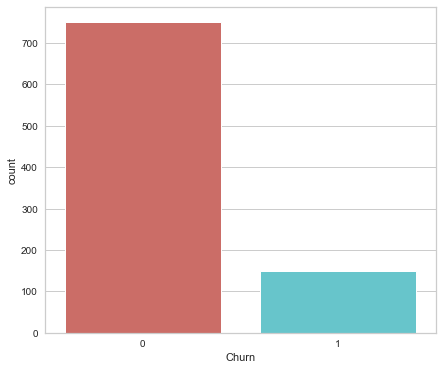

<Figure size 576x396 with 0 Axes>

In [12]:
# Checking the churn distribuition
churn_distr = df['Churn'].value_counts().plot(kind='bar',  figsize=(7, 6), rot=0, color='blue')
sns.set(font_scale=1.3)
sns.countplot(x = 'Churn', data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot')
churn_distr

In [13]:
# Checking the churn distribuition
churn_distr = df['Churn'].value_counts()*100/df.shape[0]
churn_distr

0    83.333333
1    16.666667
Name: Churn, dtype: float64

In [14]:
# Create histograma for each variable
#df.hist()

In [15]:
# Correlation between variables
corr = df.corr()
corr

Age  Total_Purchase  Account_Manager     Years  \
Age              1.000000       -0.037208        -0.014749  0.005625   
Total_Purchase  -0.037208        1.000000         0.015856 -0.005623   
Account_Manager -0.014749        0.015856         1.000000  0.022930   
Years            0.005625       -0.005623         0.022930  1.000000   
Num_Sites       -0.006070       -0.003390         0.033401  0.051642   
Churn            0.085926        0.024031         0.070611  0.214329   

                 Num_Sites     Churn  
Age              -0.006070  0.085926  
Total_Purchase   -0.003390  0.024031  
Account_Manager   0.033401  0.070611  
Years             0.051642  0.214329  
Num_Sites         1.000000  0.525398  
Churn             0.525398  1.000000

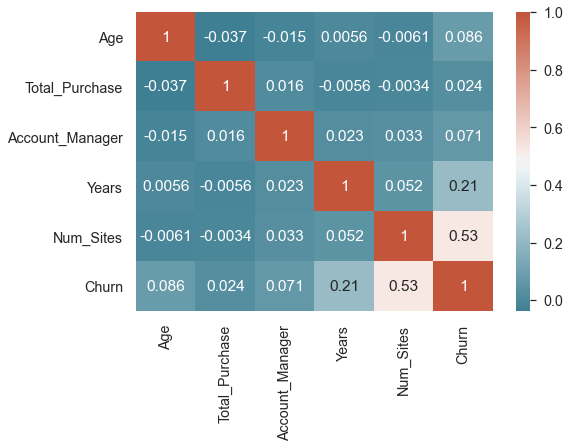

In [16]:
# Fazendo o plot da correção acima
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

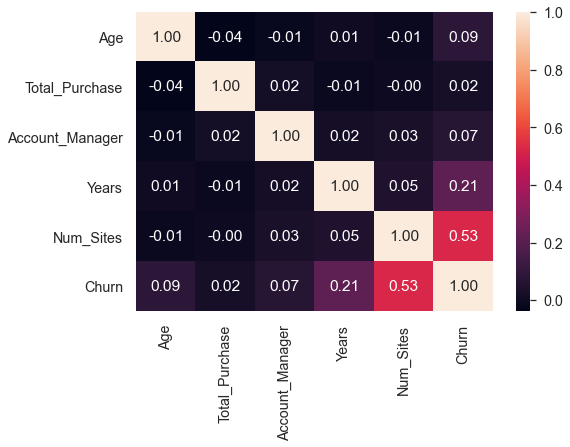

In [17]:
# Ploting the correlation using seaborn module
sns.heatmap(df.corr(), annot=True, fmt=".2f");

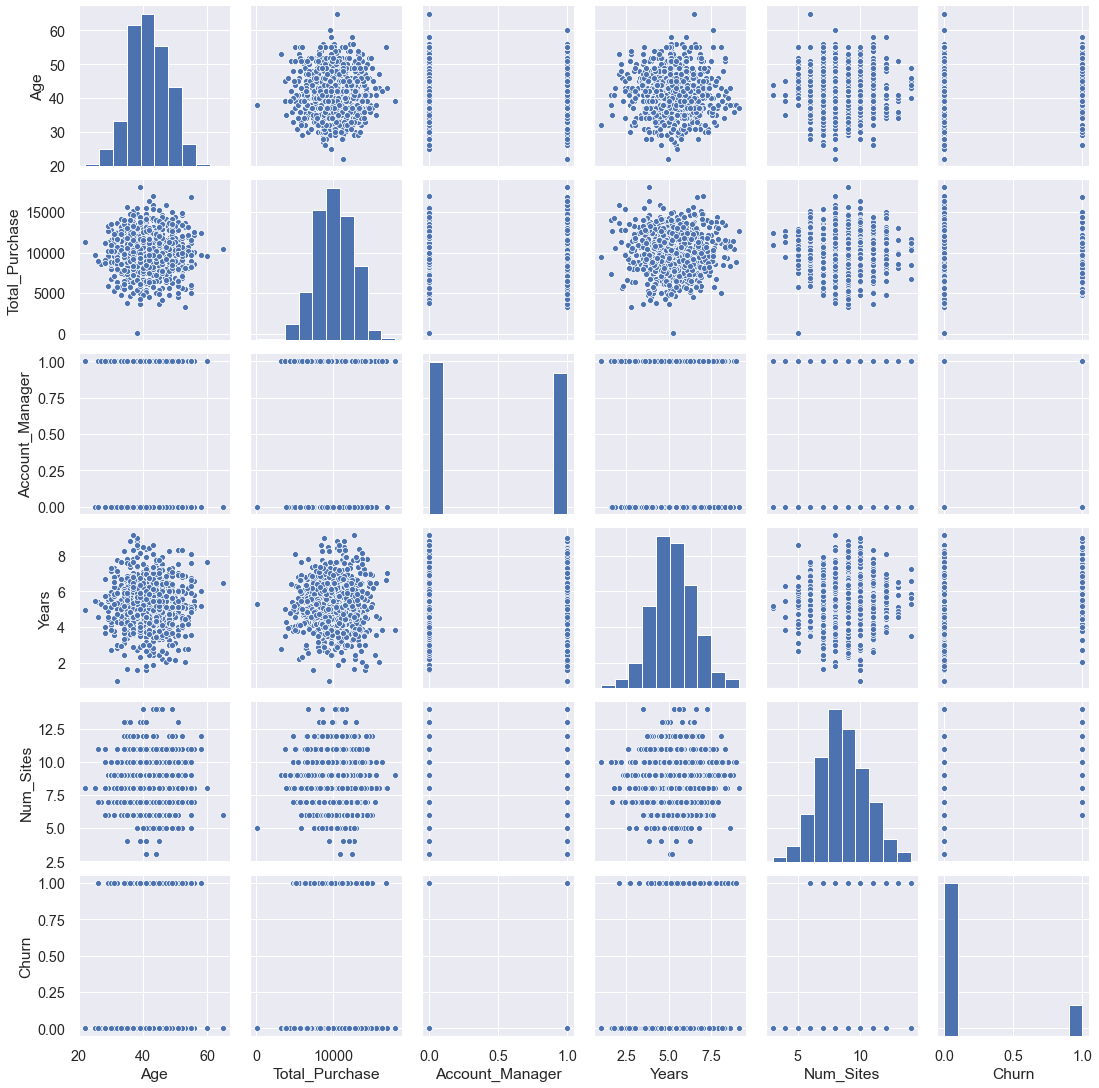

In [18]:
sns.pairplot(df)

In [19]:
# EDA
df.profile_report()
Projetc_EDA = df.profile_report(title='EDA - Exploratory Data Analysis')
Projetc_EDA.to_file(output_file=r'C:\Users\hik_m\Documents\Jornada do Conhecimento\Projetos\Capstone Projetct Churning Customers\EDA - Capstone Project To Predicting Churning Customers Inside 21st Century.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 58.82it/s]


<h4><h4><font color='blue'>===================== Phase 3: Preparing the Data =====================</font></h4>
<h5>In this phase, I'm going to prepar the whole data to the next phase, modeling.</h5>
<ul>
    <li>Data Selection</li>
        <h5>Here, I need to select the data that I'll use to train and test my model.</h5>
        <h5>Will I use: </h5>
        <ul>
            <li>Ouliers?</li>
            <font color = "green">The variables are able to use, thre is no high importance to handle with outliers in this dataset</font><br>
            <li>All rows and columns?</li>
            <font color = "green">I'll use all columns, because there weren't a high correlation between them</font><br>
        </ul>
</ul>

In [20]:
df.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [21]:
#df = df.drop(['Onboard_date'], axis = 1)
#df = df.drop(['Location'], axis = 1)

In [22]:
df.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [23]:
# Segregating the dataset with predictive variables (independent) of my variable to be predicted (label / dependent)

# Predictive
previsoras = df.iloc[:, 1:9].values 
previsoras

array([[42.0, 11066.8, 0, ..., '2013-08-30 07:00:40',
        '10265 Elizabeth Mission Barkerburgh, AK 89518', 'Harvey LLC'],
       [41.0, 11916.22, 0, ..., '2013-08-13 00:38:46',
        '6157 Frank Gardens Suite 019 Carloshaven, RI 17756',
        'Wilson PLC'],
       [38.0, 12884.75, 0, ..., '2016-06-29 06:20:07',
        '1331 Keith Court Alyssahaven, DE 90114',
        'Miller, Johnson and Wallace'],
       ...,
       [45.0, 12056.18, 0, ..., '2014-06-20 05:10:09',
        'Unit 8633 Box 8738 DPO AA 14126-5026', 'Schneider-Smith'],
       [51.0, 6517.93, 1, ..., '2012-05-30 00:15:43',
        '49800 Torres Ways Suite 886 West Bradleybury, LA 05945-2648',
        'Robles-Abbott'],
       [39.0, 9315.6, 1, ..., '2010-09-25 12:16:08',
        '27252 Olivia Burgs Rivasmouth, MN 80121-6348', 'Davis Group']],
      dtype=object)

In [24]:
previsoras[0]

array([42.0, 11066.8, 0, 7.22, 8.0, '2013-08-30 07:00:40',
       '10265 Elizabeth Mission Barkerburgh, AK 89518', 'Harvey LLC'],
      dtype=object)

In [25]:
# Label variable
classe = df.iloc[:, 9].values
classe

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<h4><font color='orange'>I checked the feature importance in each model after fit. You can check this information in phase 4 - Modeling</font></h4>

<ul>
    <li>Data Cleaning</li>
        <h5>Here, it's possible to check the format of each data like numbers interpreted as string, missing values, transformations and etc.</h5>
</ul>

<h4>Missing values</h4>

In [26]:
def missing_values(dataset):
    '''
        Checking missing values in each colum
    '''
    return dataset.isnull().sum()

In [27]:
print(missing_values(df))

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64


<h5><font color ="green">In this case, there is no need to handle with null values. The data set has all columns filled</font></h5>

<h4>Working with categorical variables</h4>

<h5>To work with the categorical values of the data set I used the label encode which transforms categorical values into numeric values. The generated numerical values characterize each category in the transformed column. There are other ways to act with categorical values such as the One Hot Enconder which distributes categorical values creating new columns in the data set, however for this project the use of Label Encoder provides the transformation without sending data without creating problems to enumerate the existing data and also, this transformation allows data to be stored using less disk space while maintaining the same number of columns in the data set.</h5>

In [28]:
df.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [29]:
# I create a variable called labelencoder of the class we just imported (LabelEncoder)
labelencoder = LabelEncoder ()

In [30]:
# Do the conversion
previsoras[:, 0] = labelencoder.fit_transform(previsoras[:, 0])
previsoras[:, 5] = labelencoder.fit_transform(previsoras[:, 5])
previsoras[:, 6] = labelencoder.fit_transform(previsoras[:, 6])
previsoras[:, 7] = labelencoder.fit_transform(previsoras[:, 7])
#previsoras[:, 7] = labelencoder.fit_transform(previsoras[:, 7])

In [31]:
previsoras[0]

array([18, 11066.8, 0, 7.22, 8.0, 634, 81, 325], dtype=object)

In [32]:
previsoras

array([[18, 11066.8, 0, ..., 634, 81, 325],
       [17, 11916.22, 0, ..., 631, 487, 849],
       [14, 12884.75, 0, ..., 871, 114, 499],
       ...,
       [21, 12056.18, 0, ..., 706, 895, 680],
       [27, 6517.93, 1, ..., 541, 402, 648],
       [15, 9315.6, 1, ..., 417, 206, 189]], dtype=object)

In [33]:
# Checking the unique values e proportion of each one

#print('Names', df['Names'].unique())
#print('Age', df['Age'].unique())              
#print('Total_Purchase', df['Total_Purchase'].unique())   
#print('Account_Manager', df['Account_Manager'].unique())  
#print('Years', df['Years'].unique())            
#print('Num_Sites', df['Num_Sites'].unique())        
#print('Onboard_date', df['Onboard_date'].unique())     
#print('Location', df['Location'].unique())         
#print('Company', df['Company'].unique())          
#print('Churn', df['Churn'].unique())            

In [34]:
# Using the train_test_split function to separate training and test data
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsoras, classe, test_size = 0.3, random_state = 0) 

In [35]:
# Checking data segregation
print('__________ Treinamento __________', '\nDados de Treinamento:' , X_treinamento.shape, '\nLabel de Treinamento:', y_treinamento.shape)
print('\n_____________ Teste _____________', '\nDados de Teste:' , X_teste.shape, '\nLabel de Teste:', y_teste.shape)

__________ Treinamento __________ 
Dados de Treinamento: (630, 8) 
Label de Treinamento: (630,)

_____________ Teste _____________ 
Dados de Teste: (270, 8) 
Label de Teste: (270,)


<ul>
    <br><li>Construct Data</li>
        <h5>Here, it's possible to create columns as you need. In this part, I can use the feature engineering the most</h5>
        <h4><font color = 'green'>For this exemplo, there wasn't a need to construct more variables</font></h4>
    <br><li>Integrating Data</li>
        <h5>This is an important step when you need to integrate differents datasets and also diferrents orgins data</h5>
        <h4><font color = 'green'>For this exemplo, there wasn't a need to integratind data with other sources</font></h4>
</ul>

<h4><font color='blue'>======================= Phase 4: Modeling ========================</font></h4>

<h5>As the problem I am dealing with in the project to predict customer churn has a label column in which which customers have churned or not, it is inferred in a supervised learning task, where a mathematical function maps inputs (independent variables) to an output ( dependent variable). To generate the solution, four machine learning models were tested, chosen at random and which are models used in supervised tasks, they were: Logistic Regression, Naive-Bayes, Random Forest and Decision Trees.</h5>

<h5>It is important to note that there are a variety of models that can be used to handle the supervised learning task and that it is always valid to use more than one model for the purpose of comparing performance in order to find an optimal solution to the problem addressed. In addition, adjustments can be applied to model parameters to adjust their performance.</h5> 

<h4>Model: Logistic Regression</h4>

In [36]:
# Creating the logistic regression model
reglog = LogisticRegression()

In [37]:
# Making the fit of my model. In other words, learning process of my logistic regression algorithm
reglog.fit(X_treinamento, y_treinamento)

C:\Users\hik_m\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
# Feature Importance - Logistic Regression Model
importances_lr = reglog.coef_
importances_lr

array([[-5.50046297e-02, -2.05057256e-04,  2.29853165e-02,
        -8.90824553e-02,  3.87629183e-01, -1.84065095e-03,
        -7.88915406e-04, -6.71747277e-04]])

In [39]:
# Carrying out predictions using the test model and data
previsoes_reglog = reglog.predict(X_teste)
previsoes_reglog

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int64)

<h4>Model: Naive Bayes - Gaussian</h4>

In [40]:
# Creating the NaiveBayes object
naive_bayes = GaussianNB()

In [41]:
# Let's do the model training with the "fit", that is, with the fit I will try to fit the training data into the model
#tTrying to relate the training data (X_training) to the responses (y_training)
naive_bayes.fit(X_treinamento, y_treinamento)

# Note: This python algorithm does not allow you to check the probabilities that have been generated, however the probability table has already been created.
# So, I will no longer need the X_training data, because the model has already been created and also trained through "fit" with the training data

GaussianNB()

In [42]:
# Feature Importance - Naive Bayes Model
importances_nb = permutation_importance(naive_bayes, X_teste, y_teste)
print(importances_nb.importances_mean)

[ 0.00222222 -0.00148148 -0.00074074  0.01037037  0.12740741  0.00148148
  0.          0.        ]


In [43]:
# Making predictions
previsoes_nb = naive_bayes.predict (X_teste)

In [44]:
# Opening the found forecast values
previsoes_nb[:]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int64)

In [45]:
previsoes_nb.shape

(270,)

<h4>Model: Random Forest</h4>

In [46]:
# I create my object which receives the algorithm
floresta = RandomForestClassifier(n_estimators = 10000)

# Obs .: The parameter n_estimator shows the number of trees that my model will use to classify

In [47]:
# 'Fit' my forest model with the training data.
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier(n_estimators=10000)

In [48]:
# Feature Importance - Random Forest Model
importances_rf = floresta.feature_importances_
importances_rf

array([0.09548978, 0.11053139, 0.02232726, 0.15743981, 0.2963278 ,
       0.11134233, 0.10302261, 0.10351902])

In [49]:
# Making Predictions
previsoes_rf = floresta.predict(X_teste)
previsoes_rf

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

<h4>Model: Decision Tree</h4>

In [50]:
arvore = DecisionTreeClassifier()

In [51]:
# Doing model learning
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [52]:
# Feature Importance - Decision Tree
imporrances_dt = arvore.feature_importances_
imporrances_dt

array([0.09486311, 0.1399562 , 0.03286942, 0.15780677, 0.33316175,
       0.07970784, 0.10253896, 0.05909596])

In [53]:
# Making predictions
previsoes_ad = arvore.predict (X_teste)
previsoes_ad

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0], dtype=int64)

<h4><font color='blue'>======================= Phase 5: Evaluation =======================</font></h4>

<h5>Now, it's the time to verify if the success criteria defined in first phase was accomplished. Here, I can use some metrics to check the performance of my model like ROC, mean square error and etc.</h5>

<h5>I create some functions to make tha code reusable. All functions can be checked below, before applying that in each model</h5>

In [54]:
def func_taxa_acerto(y, previsoes):
    '''
        Checking the hit rate
    '''
    return  accuracy_score(y, previsoes)

def func_confusion_matrix(y, previsoes):
    '''
        Using the confusion matrix to compare the values found or predicted with the variable y_test
    '''
    conf_matrix =  confusion_matrix(y_teste, previsoes)
    return conf_matrix

def plot_confusion_matrix(model, X_trein, y_trein, X_test, y_test):
    '''
        I create the visualization object v using the yellowbrick library to make the results more pleasant
    '''
    v = ConfusionMatrix(model)
    v.fit(X_trein, y_trein)
    v.score(X_test, y_test)
    return v.poof()

def metrics(y, previsoes):
    '''
        Checking the precision, recall, f1-score and support
    '''
    return classification_report(y, previsoes)

def roc(y_test, model, X_test):
    '''
        Checking the ROC curve
    '''
    logit_roc_auc = roc_auc_score(y_teste, model.predict(X_teste))
    fpr, tpr, thresholds = roc_curve(y_teste, model.predict_proba(X_teste)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

<h4>Model: Logistic Regression</h4>

In [55]:
# Checking the hit rate
#taxa_acerto_reglog = accuracy_score(y_teste, previsoes_reglog)
#taxa_acerto_reglog

print('Taxa de Acerto:', func_taxa_acerto(y_teste, previsoes_reglog))

Taxa de Acerto: 0.8444444444444444


In [56]:
# Checking the error rate
#taxa_erro_reglog = 1-taxa_acerto_reglog
#taxa_erro_reglog

print('Taxa de Erro:', 1-(func_taxa_acerto(y_teste, previsoes_reglog)))

Taxa de Erro: 0.15555555555555556


In [57]:
# Using the confusion matrix to compare the values found or predicted with the variable y_test
#confusao_reglog = confusion_matrix(y_teste, previsoes_reglog)
#confusao_reglog

print('Confusion Matrix: ', func_confusion_matrix(y_teste, previsoes_reglog))

Confusion Matrix:  [[221   8]
 [ 34   7]]


C:\Users\hik_m\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\Users\hik_m\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


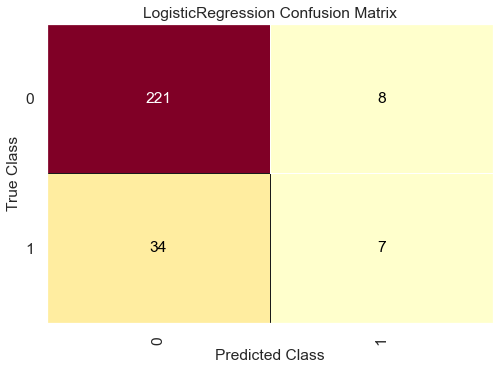

AxesSubplot(0.125,0.125;0.775x0.755)


In [58]:
# I create the visualization object v using the yellowbrick library to make the results more pleasant
#v = ConfusionMatrix(LogisticRegression())
#v.fit(X_treinamento, y_treinamento)
#v.score(X_teste, y_teste)
#v.poof()

print(plot_confusion_matrix(LogisticRegression(), X_treinamento, y_treinamento, X_teste, y_teste))

In [59]:
# Checking the precision, recall, f1-score and support
#print(classification_report(y_teste, previsoes_reglog))

print(metrics(y_teste, previsoes_reglog))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       229
           1       0.47      0.17      0.25        41

    accuracy                           0.84       270
   macro avg       0.67      0.57      0.58       270
weighted avg       0.81      0.84      0.81       270



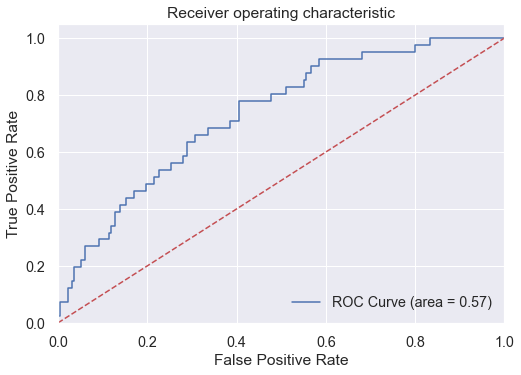

None


In [60]:
# Checking the ROC curve
#logit_roc_auc = roc_auc_score(y_teste, reglog.predict(X_teste))
#fpr, tpr, thresholds = roc_curve(y_teste, reglog.predict_proba(X_teste)[:,1])
#plt.figure()
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
#plt.show()

print(roc(y_teste, reglog, X_teste))

<h4>Model: Naive Bayes - Gaussian</h4>

In [61]:
# Checking the hit rate
print('Taxa de Acerto:', func_taxa_acerto(y_teste, previsoes_nb))

Taxa de Acerto: 0.9185185185185185


In [62]:
# Checking the error rate
print('Taxa de Erro:', 1-(func_taxa_acerto(y_teste, previsoes_nb)))

Taxa de Erro: 0.08148148148148149


In [63]:
# Using the confusion matrix to compare the values found or predicted with the variable y_test
print('Confusion Matrix: ', func_confusion_matrix(y_teste, previsoes_nb))

Confusion Matrix:  [[223   6]
 [ 16  25]]


C:\Users\hik_m\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


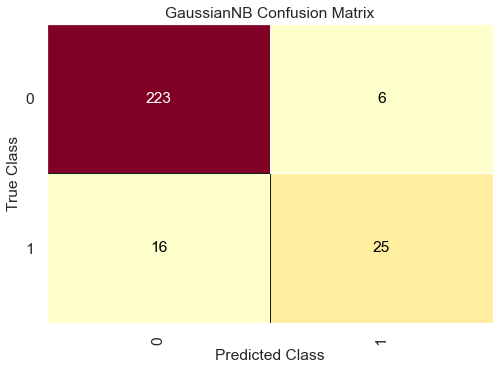

AxesSubplot(0.125,0.125;0.775x0.755)


In [64]:
# I create the visualization object v using the yellowbrick library to make the results more pleasant
print(plot_confusion_matrix(GaussianNB(), X_treinamento, y_treinamento, X_teste, y_teste))

In [65]:
# Checking the precision, recall, f1-score and support
print(metrics(y_teste, previsoes_nb))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       229
           1       0.81      0.61      0.69        41

    accuracy                           0.92       270
   macro avg       0.87      0.79      0.82       270
weighted avg       0.91      0.92      0.91       270



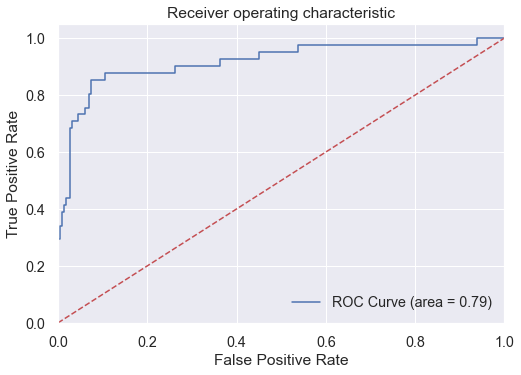

None


In [66]:
# Checking the ROC curve
print(roc(y_teste, naive_bayes, X_teste))

<h4>Model: Random Forest</h4>

In [67]:
# Checking the hit rate
print('Taxa de Acerto:', func_taxa_acerto(y_teste, previsoes_rf))

Taxa de Acerto: 0.9


In [68]:
# Checking the error rate
print('Taxa de Erro:', 1-(func_taxa_acerto(y_teste, previsoes_rf)))

Taxa de Erro: 0.09999999999999998


In [69]:
# Confusion Matrix
print('Confusion Matrix: ', func_confusion_matrix(y_teste, previsoes_rf))

Confusion Matrix:  [[222   7]
 [ 20  21]]


C:\Users\hik_m\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


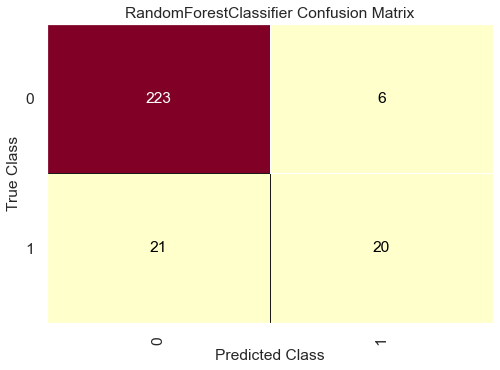

AxesSubplot(0.125,0.125;0.775x0.755)


In [70]:
# Creating the preview v object
print(plot_confusion_matrix(RandomForestClassifier(), X_treinamento, y_treinamento, X_teste, y_teste))

In [71]:
# Checking the precision, recall, f1-score and support
print(metrics(y_teste, previsoes_rf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       229
           1       0.75      0.51      0.61        41

    accuracy                           0.90       270
   macro avg       0.83      0.74      0.78       270
weighted avg       0.89      0.90      0.89       270



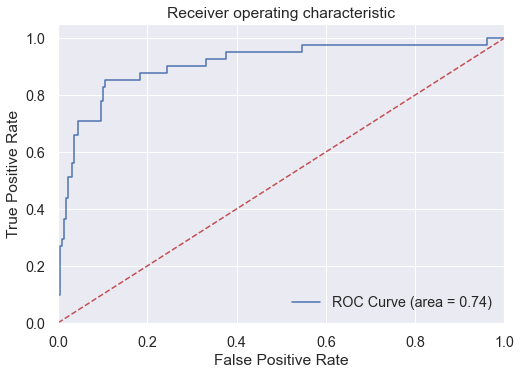

None


In [72]:
# Checking the ROC curve
print(roc(y_teste, floresta, X_teste))

<h4>Model: Decision Tree</h4>

In [73]:
# Checking the hit rate
print('Taxa de Acerto:', func_taxa_acerto(y_teste, previsoes_ad))

Taxa de Acerto: 0.8185185185185185


In [74]:
# Checking the error rate
print('Taxa de Erro:', 1-(func_taxa_acerto(y_teste, previsoes_ad)))

Taxa de Erro: 0.18148148148148147


In [75]:
# Confusion Matrix
print('Confusion Matrix: ', func_confusion_matrix(y_teste, previsoes_ad))

Confusion Matrix:  [[203  26]
 [ 23  18]]


C:\Users\hik_m\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


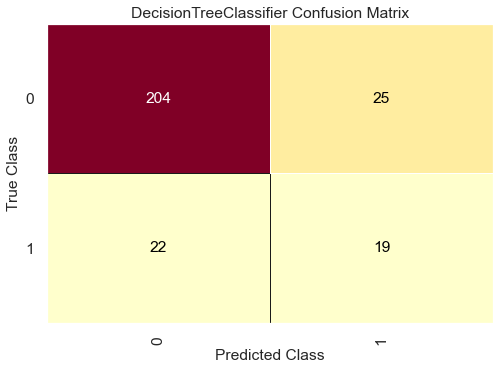

AxesSubplot(0.125,0.125;0.775x0.755)


In [76]:
# I create the visualization v object
print(plot_confusion_matrix(DecisionTreeClassifier(), X_treinamento, y_treinamento, X_teste, y_teste))

In [77]:
# Checking for precision, recall, f1-score and support
print(metrics(y_teste, previsoes_ad))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       229
           1       0.41      0.44      0.42        41

    accuracy                           0.82       270
   macro avg       0.65      0.66      0.66       270
weighted avg       0.82      0.82      0.82       270



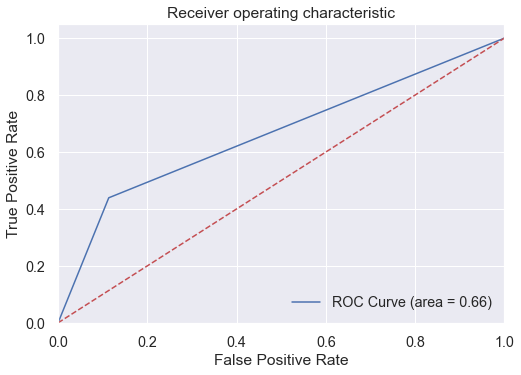

None


In [78]:
# Checking the ROC curve
print(roc(y_teste, arvore, X_teste))

<h4><font color='blue'>====================== Phase 6: Deployement ======================</font></h4>

<h5>In this phase I can deploy my model in production environment and share my solution inside the company. <br>Important things here are:</h5>
<ul>
    <li>Monitoring the results</li>
    <li>Adapt the model when necessary</li>
</ul>

<font color="green">The last phase, phase 6 - Deploy, is where the implementation is made, it can be delivered in several ways, for example, creating an application for data consumption by those involved, making the model available through the persistence of the trained model using the Pickle library python and etc. For this project, only the development of the case study was generated. The availability for consumption of the data will be developed as a point to improve the structure of this project.</font>

<h4><font color = 'green'>Conclusions</font></h4>

    a) I used the train_test_split command to segregate training data and test data. I segregated the df dataset with 70% to do the models training and 30% (rest) to do tests.
    
    b) I applied the Logistic Regression, Naive Bayes, Random Forest and Decision Tree models and presented the results found with the predictions found by the model.
        
    c) The models used are models applied to classification in supervised learning.
        Objectively, the model:
            -Logistic Regression: Logistic regression is a resource that allows estimating the probability associated with the occurrence of a given event in the face of a set of explanatory variables.
            -Naive Bayes: Generates a probability table. The classification of the instance or record is done using this table.
            -Random Forest: Classifies the new rescuer based on several decision trees. The amount I used was 10,000 trees.
            -Decision tree: Classifies the new record by going through each node of the tree.
       
    d) To compare and comment on the results obtained through the creation of the models, I used the confusion matrix, checking their correctness and error rates, accuracy, recall, f1-score, support and ROC curve.
        
        Below I share a table with ranking of the models according to the hit and error rates found:
        
            Rank    Model                   HIt Rate (TA)            TA(~)        Error Rate (TE)          TE(~)
            ----    --------------------    -------------------      -----        -----------------        -----
            1       Decision Trees          0,9185                   92%          0,0814                   08%
            2       Logistic Regression     0,9037                   90%          0,0962                   10%
            3       Random Forest           0,8444                   84%          0,1555                   16% 
            4       Naive-Bayes             0,8296                   83%          0,1703                   17%  
            
    It can be observed that the Decision Trees model presented a higher hit rate than the other models based on the data that were used. It is worth mentioning that some techniques could have been used, such as attribute selection, treatment of missing values, feature engineering, creation of dummy variables and other approaches, making an exploratory analysis of the data as well as modifying model parameters to achieve a better fit.
         
         Another point of analysis was made through precision, recall, f1-score and support.
             * Accuracy is the classifier's ability to not label a sample as positive if it is negative.
             * The recall is the classifier's ability to find all positive samples
             * The F1-score can be interpreted as a harmonic average between precision and recall, where the best value is 1 and the worst is 0.
             * Support is the number of occurrences of the class in the y_test.
            
                Logistic Regression ---------------------------------
                              precision    recall  f1-score   support

                           0       0.87      0.97      0.91       229
                           1       0.47      0.17      0.25        41

                    accuracy                           0.84       270
                   macro avg       0.67      0.57      0.58       270
                weighted avg       0.81      0.84      0.81       270
                
                Naive Bayes -----------------------------------------
                              precision    recall  f1-score   support

                           0       0.93      0.97      0.95       229
                           1       0.81      0.61      0.69        41

                    accuracy                           0.92       270
                   macro avg       0.87      0.79      0.82       270
                weighted avg       0.91      0.92      0.91       270
                
                Random Forest ---------------------------------------
                              precision    recall  f1-score   support

                           0       0.92      0.97      0.94       229
                           1       0.76      0.54      0.63        41

                    accuracy                           0.90       270
                   macro avg       0.84      0.75      0.79       270
                weighted avg       0.90      0.90      0.90       270
                
                Decision Trees -----------------------------------
                              precision    recall  f1-score   support

                           0       0.90      0.90      0.90       229
                           1       0.44      0.44      0.44        41

                    accuracy                           0.83       270
                   macro avg       0.67      0.67      0.67       270
                weighted avg       0.83      0.83      0.83       270
                
            Looking at the table above, it can be seen that the Naive Bayes model presented a higher accuracy rate (0.92 or 92%), however, as it was verified through confusion, the Decision Tree model presented a higher accuracy rate.
        
            Finally, the ROC curve is another tool widely used with binary classifiers. The dotted line represents the ROC curve. A good classifier is as far away from that line as possible (towards the upper left corner). Thus, it can be observed that the ROC curve found in the Naive Bayes model is what directs us that within the applied models, the Naive Bayes model is the best model used in this approach.

            Despite the immense value created through the development of python code to handle the data according to the purpose of each stage of the CRISP-DM methodology, the greatest value is to answer the questions defined at the beginning of the project so that they can generate value in decision making. Thus, the questions and respective answers of each one can be checked below:
            
                * Is it possible to achieve a hit rate above 80% in the customer's churn forecast?
                  Following the steps of the CRISP-DM methodology, it was possible to carry out an organized and evolutionary process for the development of a data solution. Through these steps, it was possible to train and test 4 different models where hit rates between 83% and 92% were found.

                * What is the level of correlation between the variables age, year and total_pucharse?
                  Through step 2 of the CRISP-DM, a correlation was made between the variables and a heatmp graph was generated through the seaborn library, which presented a map of color and values in relation to the variables used. In the reading done through it was possible to identify a low correlation between the variables used in the model. It is important to note that this pattern is possible and tends to benefit machine learning models since there is no skewed data.            
            
                * Is the solution developed passive to be applied in a way that the business identified benefits?
                  The generated data solution can be applied to the real world, since non-biased data were used and high hit rates were found, according to step 5 of the CRISP-DM, where the performance evaluations of each generated model were made. The point of attention is that for this project it was defined as an objective to reach a rate above 80%, that is, specifically for this project to achieve this rate would positively reflect the success criterion of the same. However, care and attention must be paid to each company and business having their respective rates that reflect their success criteria. A rate of 80% can be great for one company, but this same rate can be bad for another, it is always necessary to evaluate the scenario of the company as a whole always.
            
            Applying the data in different models is a good practice for evaluating different possibilities and choosing the one with the best accuracy for a forecast. There are several libraries focused on machine learning that can be applied in this context and expand the options for checking forecasts.